In [1]:
import torch
torch.cuda.set_device(0)
print(torch.cuda.current_device())

0


In [2]:
%run ../../prepare_data.py
%run ../../architectures.py

In [3]:
batch_size = 32

In [4]:
train_loader, valid_loader, valid_dataset = rsna_dataloaders(batch_size)

In [5]:
x, y = next(iter(train_loader))

In [6]:
x.shape, y.shape

(torch.Size([32, 3, 256, 256]), torch.Size([32]))

In [7]:
model = resnet18(block=depthwise_block).cuda()

In [8]:
sum(p.numel() for p in model.parameters())

728193

CPU times: user 29.9 s, sys: 5.94 s, total: 35.9 s
Wall time: 36.2 s


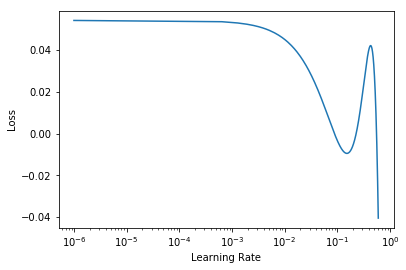

In [9]:
%%time
lrs, losses = LR_range_finder(model, train_loader, 
                              loss_fn=F.binary_cross_entropy_with_logits, 
                              binary=True, lr_high=0.6)
plot_lr(lrs, losses)

# Training

In [10]:
widths = [1.0, 0.75, 0.5, 0.25]
depths = [[[[64, 2], [128, 2]], [[256, 2], [512, 1]]],
          [[[64, 2], [128, 2]], [[256, 1], [512, 1]]],
          [[[64, 2], [128, 1]], [[256, 1], [512, 1]]],
          [[[64, 2], [128, 1]], [[256, 2], [512, 1]]],
          [[[64, 1], [128, 1]], [[256, 2], [512, 1]]],
          [[[64, 1], [128, 1]], [[256, 1], [512, 1]]],
         ]

In [12]:
data = []

for w in widths:
    for d in depths:
        d_s = sum(j[1] for i in d for j in i)
        print('width multiplier - %.3f depth multiplier - %.3f' % (w, d_s))
        model = resnet18(block=depthwise_block, width_mult=w, 
                         inverted_residual_setting1=d[0], 
                         inverted_residual_setting2=d[1]).cuda()
        
        p = sum(p.numel() for p in model.parameters())
        optimizer = create_optimizer(model, 0.1)
        score, t = train_triangular_policy(model, optimizer, train_loader, valid_loader, valid_dataset,
                                           loss_fn=F.binary_cross_entropy_with_logits, 
                                           dataset='rsna', binary=True, max_lr=0.1, epochs=15)
        data.append([w, d_s, score, p, t])
        print('')

width multiplier - 1.000 depth multiplier - 7.000
train_loss 0.030 val_loss 19.524 val_auc_score 0.624
----End of step 0:01:02.513159
train_loss 0.134 val_loss 64.853 val_auc_score 0.535
----End of step 0:01:02.152899
train_loss 0.387 val_loss 320.681 val_auc_score 0.526
----End of step 0:01:01.846001
train_loss 2.702 val_loss 1627.321 val_auc_score 0.597
----End of step 0:01:01.450035
train_loss 10.864 val_loss 82320.222 val_auc_score 0.497
----End of step 0:01:02.771972
train_loss 13.376 val_loss 731.406 val_auc_score 0.611
----End of step 0:01:04.145403
train_loss 11.401 val_loss 60029.963 val_auc_score 0.625
----End of step 0:01:02.813704
train_loss 4.655 val_loss 39733.781 val_auc_score 0.594
----End of step 0:01:01.696390
train_loss 1.413 val_loss 52.109 val_auc_score 0.606
----End of step 0:01:00.540937
train_loss 0.506 val_loss 12.216 val_auc_score 0.632
----End of step 0:01:00.662393
train_loss 0.274 val_loss 86.048 val_auc_score 0.609
----End of step 0:01:01.339227
train_loss

train_loss 1.861 val_loss 1750.354 val_auc_score 0.377
----End of step 0:01:14.673170
train_loss 7.354 val_loss 66541.395 val_auc_score 0.409
----End of step 0:01:10.367678
train_loss 5.082 val_loss 659005.179 val_auc_score 0.352
----End of step 0:01:06.011598
train_loss 4.470 val_loss 1771.344 val_auc_score 0.357
----End of step 0:01:06.347910
train_loss 2.353 val_loss 273.951 val_auc_score 0.396
----End of step 0:01:05.411926
train_loss 1.413 val_loss 85.676 val_auc_score 0.557
----End of step 0:01:05.657979
train_loss 0.943 val_loss 10.480 val_auc_score 0.690
----End of step 0:01:05.994396
train_loss 0.387 val_loss 157.903 val_auc_score 0.637
----End of step 0:01:05.789104
train_loss 0.394 val_loss 11.223 val_auc_score 0.631
----End of step 0:01:05.015309
train_loss 0.237 val_loss 6.213 val_auc_score 0.389
----End of step 0:01:05.513908
train_loss 0.256 val_loss 2.912 val_auc_score 0.679
----End of step 0:01:05.818237
train_loss 0.525 val_loss 2.974 val_auc_score 0.654
----End of st

train_loss 5.414 val_loss 284305.040 val_auc_score 0.548
----End of step 0:01:10.122049
train_loss 3.177 val_loss 87.732 val_auc_score 0.413
----End of step 0:01:08.373130
train_loss 1.111 val_loss 19.896 val_auc_score 0.537
----End of step 0:01:08.239447
train_loss 0.364 val_loss 8.877 val_auc_score 0.651
----End of step 0:01:07.785468
train_loss 0.360 val_loss 7.255 val_auc_score 0.638
----End of step 0:01:06.445525
train_loss 0.372 val_loss 3.855 val_auc_score 0.606
----End of step 0:01:04.841240
train_loss 0.304 val_loss 2.559 val_auc_score 0.518
----End of step 0:01:05.477044
train_loss 0.569 val_loss 1.638 val_auc_score 0.485
----End of step 0:01:05.231030

width multiplier - 0.500 depth multiplier - 6.000
train_loss 0.021 val_loss 16.275 val_auc_score 0.593
----End of step 0:01:03.047483
train_loss 0.130 val_loss 37.902 val_auc_score 0.622
----End of step 0:01:03.193555
train_loss 0.329 val_loss 258.272 val_auc_score 0.481
----End of step 0:01:03.206116
train_loss 3.113 val_loss

train_loss 0.255 val_loss 506.379 val_auc_score 0.454
----End of step 0:01:09.236086
train_loss 0.362 val_loss 13.555 val_auc_score 0.474
----End of step 0:01:08.794977
train_loss 0.583 val_loss 6.323 val_auc_score 0.526
----End of step 0:01:11.485987

width multiplier - 0.250 depth multiplier - 6.000
train_loss 0.022 val_loss 15.115 val_auc_score 0.614
----End of step 0:01:09.596515
train_loss 0.103 val_loss 36.255 val_auc_score 0.584
----End of step 0:01:07.137267
train_loss 0.320 val_loss 221.733 val_auc_score 0.653
----End of step 0:01:10.185551
train_loss 2.337 val_loss 685.161 val_auc_score 0.442
----End of step 0:01:05.108256
train_loss 10.327 val_loss 3080.284 val_auc_score 0.393
----End of step 0:01:05.592828
train_loss 17.455 val_loss 16501.370 val_auc_score 0.575
----End of step 0:01:05.935766
train_loss 9.909 val_loss 238.973 val_auc_score 0.623
----End of step 0:01:04.850426
train_loss 3.152 val_loss 33.621 val_auc_score 0.637
----End of step 0:01:05.257636
train_loss 0.63

In [13]:
columns = ['width_x', 'depth_x', 'val_score', 'params', 'time_per_epoch']
df = pd.DataFrame(data=data, columns=columns)

In [14]:
df.to_csv("rsna_resnet_depthwise.csv", index=False)

In [15]:
df_re = pd.read_csv('rsna_resnet_depthwise.csv')

In [ ]:
df_re.head()